In [142]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score



In [33]:
filename = "avocado.csv"
df = pd.read_csv(filename)
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
#4046 - Total number of avocados with PLU 4046 sold  #Product Lookup codes (PLU’s)
#4225 - Total number of avocados with PLU 4225 sold
#4770 - Total number of avocados with PLU 4770 sold
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
df.duplicated().sum() #check for duplicates 

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [35]:
#drop region and dates
df = df.drop(["region", "Date"], axis = 1)

In [28]:
df.head(100)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
95,43,0.99,512532.44,441544.00,21183.70,347.78,49456.96,32180.90,17273.38,2.68,0,2015
96,44,1.10,431308.56,369316.29,18324.76,237.47,43430.04,33423.74,10006.30,0.00,0,2015
97,45,1.06,427391.28,364446.77,17420.41,638.18,44885.92,26727.66,18158.26,0.00,0,2015
98,46,1.03,433883.91,377256.38,17162.50,524.85,38940.18,18044.41,20895.77,0.00,0,2015


In [29]:
#how many values in type column
df["year"].value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <BarContainer object of 10 artists>)

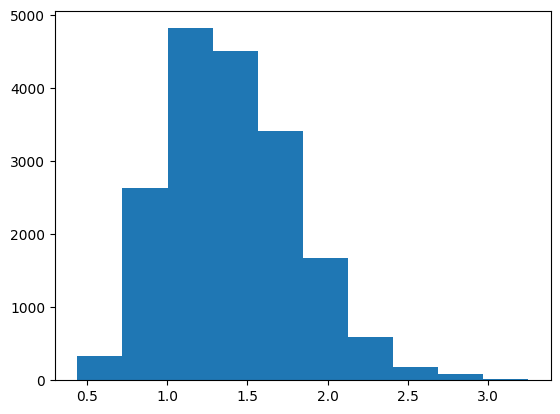

In [10]:
plt.hist(df["AveragePrice"], bins = 10)

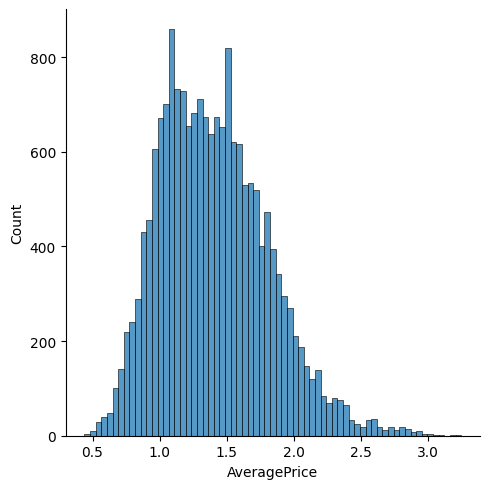

In [30]:
sns.displot(df["AveragePrice"])

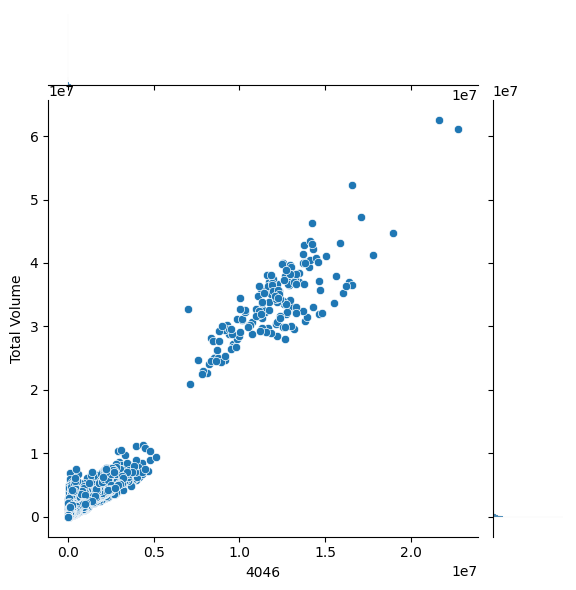

In [12]:
sns.jointplot( x = "4046", y="Total Volume", data = df)

In [36]:
df #checing dataframe

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018


In [45]:
#LbelEncode type column 
label = LabelEncoder()
df["type"] = label.fit_transform(df["type"])
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015


In [ ]:
#onehot encode year column
OneHotEncoder = pd.get_dummies(df['year'], dtype = int)
df_new = pd.get_dummies(df['year'], dtype = int)

In [44]:
df_new

,2015,2016,2017,2018
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
18244,0,0,0,1
18245,0,0,0,1
18246,0,0,0,1
18247,0,0,0,1


In [48]:
encoded_data =pd.concat([df.drop(['year'], axis = 1), df_new], axis = 1) #dropped"year column and added encoded new column
encoded_data.head() 

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,2015,2016,2017,2018
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1,0,0,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,1,0,0,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,1,0,0,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,1,0,0,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,1,0,0,0


In [52]:
#split data into train and test
X = encoded_data.drop("AveragePrice", axis = 1).values
y = encoded_data["AveragePrice"].values

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size =0.5, random_state=42)

In [76]:
#Scale data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [78]:
print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_val: ", y_val.shape)
print("y_test: ", y_test.shape)

X_train:  (14599, 14)
X_val:  (1825, 14)
X_test:  (1825, 14)
y_train:  (14599,)
y_val:  (1825,)
y_test:  (1825,)


In [80]:
#Train the model
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train,y_train)


KNeighborsRegressor()

In [108]:
#test the model
y_pred = model.predict(X_test)
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("mean square error:", mean_squared_error(y_test, y_pred))



mean absolute error:  0.1700394520547945
mean square error: 0.05326571616438356


In [84]:
#choose the best k
scores = []
nums = range(1,30)
best_k =[]
best_score_i =-1000

for i in nums:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_i = knn.score(X_test, y_test)
    scores.append(score_i)
    if score_i > best_score_i:
        best_score_i = score_i
        best_k = i
print("best score: ", best_score_i)
print("best k: ", best_k)


best score:  0.638389449370008
best k:  6


In [85]:
print(scores)

[0.46377387844124485, 0.5847402756976205, 0.6076312008354782, 0.6333918968313983, 0.6379749349530036, 0.638389449370008, 0.636469004967342, 0.6374978964888983, 0.6352906678462499, 0.6301991256842131, 0.6239277825918701, 0.620044489093291, 0.6154771628486001, 0.6124838234382712, 0.6087064792173318, 0.6084478019824477, 0.6058119712498666, 0.6016796229666257, 0.5981884408933305, 0.59485484263329, 0.5931477500898901, 0.5905366808736136, 0.5871847600146574, 0.5823091892176173, 0.5800930843880852, 0.5752511276411472, 0.5730697620300647, 0.5707438147652184, 0.5679872124665549]


Text(0.5, 1.0, 'Elbow Curve')

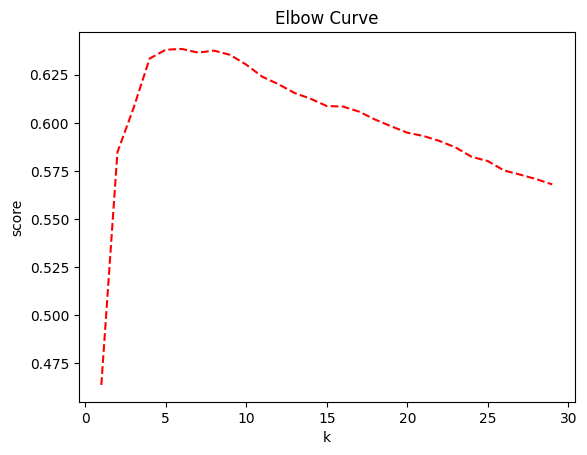

In [97]:
#Elbow Curve
plt.plot(nums, scores, color = "red", linestyle = "dashed")   
plt.xlabel("k")
plt.ylabel("score")
plt.title("Elbow Curve")

In [99]:
#Validate the model
knn_best = KNeighborsRegressor(n_neighbors = best_k)
knn_best.fit(X_train, y_train) #train on training set 
y_pred_val =knn_best.predict(X_val) #predict on validation set 

print("mean absolute error: ", mean_absolute_error(y_val, y_pred_val))
print("mean square error:", mean_squared_error(y_val, y_pred_val))

#print(f"Test accuracy: {test_accuracy:.2f}")

mean absolute error:  0.18136073059360733
mean square error: 0.06097149162861492


Validation Set
MAE = 0.181 #absolute difference between actaul and predicted values, less sensitive to outliers 
MSE = 0.061 #squared difference #more sensitive to outliers

Test set 
#MAE = 0.170
#MSE = 0.053

#Lower MAE means predictions are more accurate 
#Lower MSE means fewer larger errors(since squaring amplity errors)

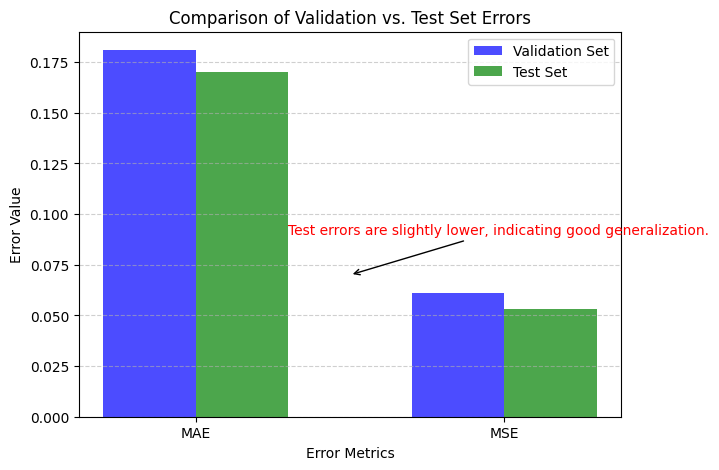

In [141]:
metrics = ["MAE", "MSE"]
validation_errors = [0.181, 0.061]  
test_errors = [0.170, 0.053]  

# Bar positions
x = np.arange(len(metrics))  # [0, 1] for MAE and MSE
width = 0.3  # Width of bars

# Plot
plt.figure(figsize=(7, 5))
plt.bar(x - width/2, validation_errors, width, label="Validation Set", color='blue', alpha=0.7)
plt.bar(x + width/2, test_errors, width, label="Test Set", color='green', alpha=0.7)

# Labels and Title
plt.xlabel("Error Metrics")
plt.ylabel("Error Value")
plt.title("Comparison of Validation vs. Test Set Errors")
plt.xticks(x, metrics)  # Assign "MAE" and "MSE" to x-axis
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.6)

#Annotation
note_text = "Test errors are slightly lower, indicating good generalization."
plt.annotate(note_text, xy=(0.5, 0.07), xytext=(0.3, 0.09),
             fontsize=10, color="red", arrowprops=dict(facecolor='red', arrowstyle="->"))

# Show Plot
plt.show()

#If test errors (green bars) are lower than validation errors (blue bars) → The model generalizes well.
#If test errors are much higher → Model might be overfitting the validation data.
#If both errors are similar and low → Model is performing consistently


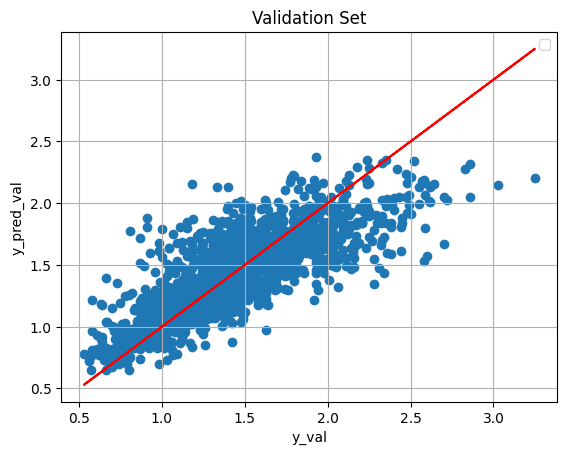

In [139]:
#plot Validation set
plt.scatter(y_val, y_pred_val)
plt.plot(y_val, y_val, color = "red")
plt.xlabel("y_val")
plt.ylabel("y_pred_val")
plt.title("Validation Set")
plt.grid(True)


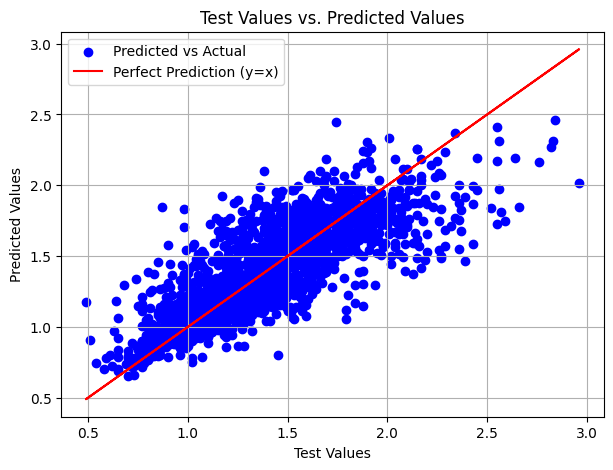

In [137]:
#Actual Values = y_test vs Predicted Values = y_pred


plt.figure(figsize=(7, 5)) #(width, height)
plt.scatter(y_test, y_pred, color='blue', label="Predicted vs Actual")  
plt.plot(y_test, y_test, color='red', label="Perfect Prediction (y=x)")  # perfect prediction line

plt.xlabel("Test Values")  
plt.ylabel("Predicted Values")
plt.title("Test Values vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


#If predictions are good: The blue points will be close to the red line.
#If predictions are poor: The blue points will be scattered away from the red line.

In [143]:
#R2 score
r2_score = r2_score(y_test, y_pred)
print("R2 score: ", r2_score)

R2 score:  0.6379749349530036


0.90 - 1.00	Excellent model (very accurate predictions)
0.70 - 0.89	Good model (captures most variance)
0.50 - 0.69	Moderate model (okay fit, may need improvement)
0.00 - 0.49	Weak model (not explaining much variance)
< 0.00	Poor model (worse than just guessing the mean)